In [36]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
from vosk import Model
from Signal_Analysis.features.signal import get_HNR
from scipy import signal
from audiostretchy.stretch import stretch_audio
import pandas as pd

# tools work in progress
import tools

reload(tools)

plt.style.use("dark_background")
mpl.rcParams["lines.linewidth"] = 0.5
plt.close("all")

## audio, labels, speech recognition

i 0.3 - 0.42
skymningen 0.42 - 1.26
en 1.35 - 1.5
mycket 1.5 - 1.8
het 1.83 - 2.1
dag 2.1 - 2.43
i 2.43 - 2.52
början 2.52 - 2.79
av 2.79 - 2.91
juli 2.91 - 3.36
lämnade 3.36 - 3.99
en 3.99 - 4.14
ung 4.14 - 4.41
man 4.41 - 4.68
sin 4.68 - 4.92
kammare 4.92 - 5.58
vid 6.48 - 6.69
steg 7.8 - 8.13
ut 8.13 - 8.31
på 8.31 - 8.43
gatan 8.43 - 9.06
och 9.06 - 9.18
långsamt 9.68798 - 10.47
och 10.47 - 10.59
obeslutsam 11.07 - 12.06
lyckligtvis 14.04 - 14.79
slapp 14.79 - 15.06
han 15.06 - 15.21
värdinnan 15.57 - 16.08
i 16.08 - 16.148024
kammare 17.25 - 17.94
som 18.0 - 18.21
in 19.11 - 19.29
under 19.32 - 19.74
den 19.74 - 19.92
höga 19.92 - 20.340363
byggnadens 21.48 - 22.17
tak 22.17 - 22.68
liknande 22.92 - 23.37
snart 23.4 - 23.85
ska 23.88 - 24.15
jag 24.15 - 24.27
köpa 24.27 - 24.51
en 24.51 - 24.66
bostad 24.66 - 25.26
värdinnan 26.97 - 27.63
som 27.63 - 27.81
vind 28.74 - 29.22
skutan 29.25 - 30.21
och 30.93 - 31.14
höll 31.14 - 31.47
honom 31.47 - 31.71
med 31.71 - 31.98
med 32.8284

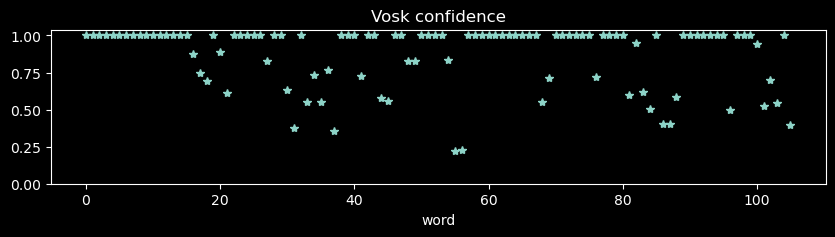

In [37]:
labels_path = (
    "example_speech_Andreas/180923214834-Y20UOTIE-text-000_vowels_timestamp_manual.csv"
)
#labels_path = "wav_examples/digitala_vowels_manual_timestamps.csv"

labels_df = pd.read_csv(labels_path)
audio_path = "audio_preproc/180923214834-Y20UOTIE-text-000_pp.wav"
#audio_path = "wav_examples/digitala_resurser_sv.wav"

Fs, audio = wavfile.read(audio_path)
model_path = "models/vosk-model-small-sv-rhasspy-0.15/"

if "model" not in locals():
    model = Model(model_path)

words = tools.rec_vosk(audio_path, model, print_summary=False)

text = " ".join([w["word"] for w in words])

# get all vowels
for w in words:
    w["vowels"] = tools.checkVowels(w["word"], tools.VOWELS_SV)
    if w["conf"] == 1:
        print(w["word"],w["start"],"-",w["end"])


#print(text)
plt.figure(figsize=(10, 2))
plt.plot([w["conf"] for w in words], "*")
plt.title("Vosk confidence")
plt.xlabel("word")
plt.ylim(bottom=0)
plt.show()


In [38]:
reload(tools)
add_context = False
fl = int(0.02 * Fs)
grouped_frames = tools.extract_vowels(words, audio, Fs, fl, add_context = False, long_frame=True)

vowels_in_text = {v: 0 for v in tools.VOWELS_SV}
for c in tools.checkVowels(text, tools.VOWELS_SV):
    vowels_in_text[c] += 1


print("found vowels:")
for v in grouped_frames.keys():
    print(
        "    ",
        v,
        len(grouped_frames[v]["frame"]),
        str(round(100 * len(grouped_frames[v]["frame"]) / max(vowels_in_text[v], 1), 3))
        + "%",
    )

print("total: vowels in text", sum([vowels_in_text[v] for v in vowels_in_text.keys()]))
for v in vowels_in_text.keys():
    print(vowels_in_text[v])

c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:585: RuntimeWarning: invalid value encountered in divide
  r_x = r_a / r_w


keep i
keep skymningen
trash en
trash mycket
trash het


c:\Users\tobia\anaconda3\Lib\site-packages\Signal_Analysis\features\signal.py:625: RuntimeWarning: divide by zero encountered in divide
  best_cands = 10.0 * np.log10( best_cands / ( 1.0 - best_cands ) )


keep dag
keep i
trash början
keep av
trash juli
keep lämnade
trash en
trash ung
keep man
keep sin
trash kammare
keep vid
trash steg
keep ut
keep på
trash gatan
keep och
trash långsamt
keep och
trash obeslutsam
trash lyckligtvis
keep slapp
trash han
trash värdinnan
trash i
trash kammare
trash som
keep in
keep under
keep den
keep höga
trash byggnadens
trash tak
keep liknande
trash snart
keep ska
keep jag
trash köpa
trash en
keep bostad
keep värdinnan
keep som
keep vind
keep skutan
trash och
trash höll
keep honom
keep med
keep med
keep mål
trash och
trash städning
keep en
trash ner
trash och
keep när
keep han
trash skulle
trash ut
keep måste
trash passera
keep värdinnan
keep kex
trash alltid
found vowels:
     e 10 26.316%
     y 1 20.0%
     u 3 30.0%
     i 10 43.478%
     o 6 35.294%
     å 3 37.5%
     a 14 31.111%
     ö 1 11.111%
     ä 4 50.0%
total: vowels in text 163
38
5
10
23
17
8
45
9
8


In [44]:
reload(tools)
starts_all, stops_all, vowels_all = tools.groupedframes_to_lists(grouped_frames)
tools.score_vs_labels(starts_all, stops_all, labels_df, vowels=vowels_all, accept_partial=True)

total found vowels: 52
unique start points: 52
unique stop points: 52
Classification errors:
- at 3.7s:
    We got a
    Correct vowel ä
- at 9.14s:
    We got o
    Correct vowel i
- at 10.51s:
    We got o
    Correct vowel i
- at 19.52s:
    We got e
    Correct vowel i
- at 19.88s:
    We got e
    Correct vowel i
- at 19.98s:
    We got ö
    Correct vowel i
- at 27.35s:
    We got ä
    Correct vowel i
- at 27.51s:
    We got a
    Correct vowel i
- at 30.07s:
    We got a
    Correct vowel i
- at 31.57s:
    We got o
    Correct vowel i
- at 32.92845804988662s:
    We got e
    Correct vowel i
- at 38.78s:
    We got e
    Correct vowel å
- at 40.47s:
    We got ä
    Correct vowel i
------------------------------
precision: 21.154% (11/52)
recall: 9.565% (11/115)


(0.21153846153846154, 0.09565217391304348)

c:\Users\tobia\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


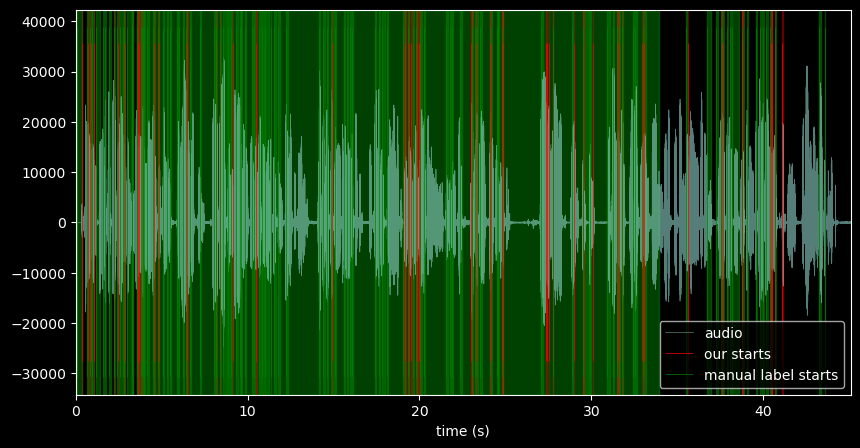

In [40]:
plt.figure(figsize=(10, 5))

tt = np.arange(len(audio)) / Fs
plt.plot(tt, audio, alpha=0.6, label="audio")
plt.vlines(starts_all, *plt.ylim(), colors="r", label="our starts")
plt.vlines(labels_df.tmin, *plt.ylim(), colors="g", label="manual label starts")
for tmin, tmax in zip(labels_df.tmin, labels_df.tmax):
    plt.axvspan(tmin, tmax, alpha=0.5, color="g")

for start, stop in zip(starts_all, stops_all):
    plt.axvspan(start, stop, alpha=0.3, color="r")


plt.xlabel("time (s)")

tr = (0, len(audio) / Fs)
#tr = (4,5.3)

plt.xlim(*tr)
plt.legend()
plt.show()

In [41]:
wavfile.write(
    "output/test.wav", Fs, tools.wavScaler(audio[int(tr[0] * Fs) : int(tr[1] * Fs)])
)

## outlier filter

In [42]:
reload(tools)
frames_inliers = tools.outlier_filter(grouped_frames, Fs)
starts_all_seconds_in, stops_all_seconds_in = tools.get_start_stop_seconds(
    frames_inliers, fl, Fs
)

tools.score_vs_labels(starts_all_seconds_in, stops_all_seconds_in, labels_df)

c:\Users\tobia\anaconda3\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


inliers (e): 60.0 %


c:\Users\tobia\anaconda3\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


inliers (y): 100.0 %


c:\Users\tobia\anaconda3\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


inliers (u): 100.0 %


c:\Users\tobia\anaconda3\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


inliers (i): 70.0 %


c:\Users\tobia\anaconda3\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


inliers (o): 83.0 %


c:\Users\tobia\anaconda3\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


inliers (å): 100.0 %


c:\Users\tobia\anaconda3\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


inliers (a): 71.0 %


c:\Users\tobia\anaconda3\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


inliers (ö): 100.0 %


c:\Users\tobia\anaconda3\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


inliers (ä): 75.0 %


AttributeError: module 'tools' has no attribute 'get_start_stop_seconds'